In [123]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [162]:
u0 = 100 # initial conditions for u and v
v0 = 99

a1 = 100 # a1 and a2 are the alphas: synthesis rates for u and v, respectively
a2 = 100
beta = 3 # beta & gamma are cooperativity values 
gamma = 3

T = 50.0  # total time
dt = .1  # time step
n = int(T / dt)  # number of iterations

u = [None]*n # arrays to store u(t), v(t)
v = [None]*n

u[0] = u0 # start with the initial conditions
v[0] = v0

In [163]:
for i in range (n-1):
    last_u = u[i] # what was the last point
    last_v = v[i]
    u[i+1] = last_u + ((a1 / (1 + last_v**beta)) - last_u) * dt # update with the last point plus dt * the new value
    v[i+1] = last_v + ((a2 / (1 + last_u**gamma)) - last_v) * dt

([<matplotlib.axis.XTick at 0x7f706386ad68>,
 <a list of 6 Text xticklabel objects>)

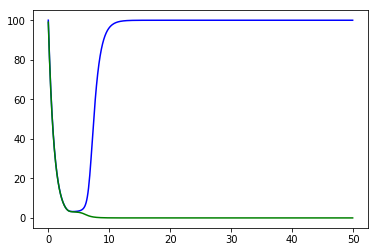

In [164]:
plt.plot(range(n), u, color='blue') # plot
plt.plot(range(n), v, color='green')
tic = n/5.
lab = int(tic * dt)
plt.xticks([0, tic, tic*2, tic*3, tic*4, tic*5], [0, lab, lab*2, lab*3, lab*4, lab*5])

In [165]:
u[100]

96.25129180838833

In [166]:
v[100]

0.030208292404725563